Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Generating synthetic regression dataset using numpy

In [20]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Independent variable (100 samples, 1 feature)
y = 4 + 3 * X + np.sin(5 * X) + np.random.randn(100, 1)  # Dependent variable with some noise and non-linearity

Split the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

Fit a Support Vector Regressor (SVR) using scikit-learn

In [22]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Using the Radial Basis Function (RBF) kernel
svr_reg.fit(X_train, y_train.ravel())  # Training the model on training data

SVR(C=100, gamma=0.1)

Predict the target values for the test data

In [23]:
y_pred = svr_reg.predict(X_test)

Visualizing the data and SVR model fit

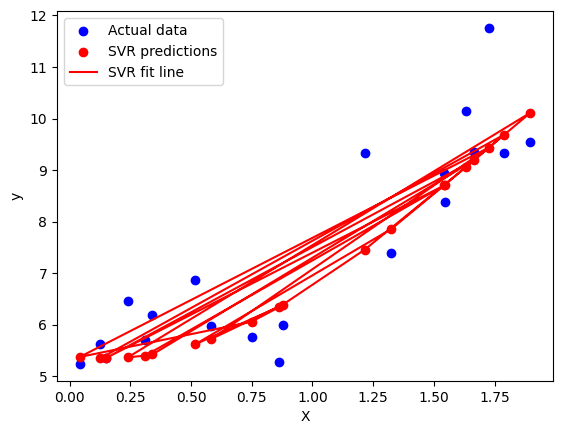

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # Plot actual data points
plt.scatter(X_test, y_pred, color='red', label='SVR predictions')  # Plot predicted values
plt.plot(X_test, y_pred, color='red', label='SVR fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

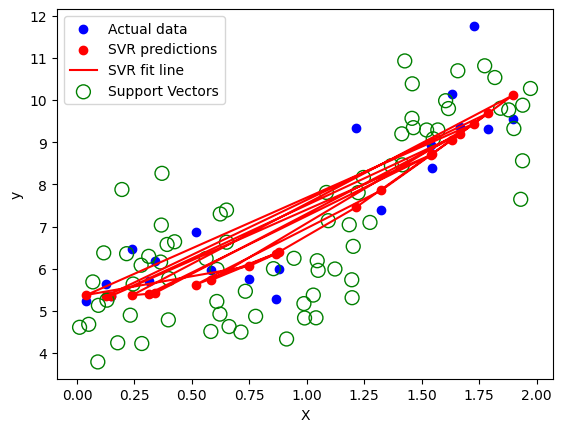

In [31]:
# Visualizing the data, SVR model fit, and support vectors
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # Plot actual data points
plt.scatter(X_test, y_pred, color='red', label='SVR predictions')  # Plot predicted values
plt.plot(X_test, y_pred, color='red', label='SVR fit line')

# Highlight support vectors
plt.scatter(X_train[svr_reg.support_], y_train[svr_reg.support_], facecolors='none', edgecolors='green',
            s=100, label='Support Vectors')  # Plot the support vectors with green edges

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Essential Metrics Calculation

Residual Sum of Squares (RSS)

In [25]:
residuals = y_test - y_pred.reshape(-1, 1)
RSS = np.sum(residuals ** 2)
print("Residual Sum of Squares (RSS):", RSS)

Residual Sum of Squares (RSS): 15.896471742918548


Mean Squared Error (MSE)

In [26]:
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", MSE)

Mean Squared Error (MSE): 0.7948235871459274


Mean Absolute Error (MAE)

In [27]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 0.6616250451254013


R-squared (R²)

In [28]:
R2 = r2_score(y_test, y_pred)
print("R-squared (R²):", R2)

R-squared (R²): 0.786156139039933


Root Mean Squared Error (RMSE) - sometimes used for regression tasks

In [29]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 0.891528792101482


Predict on a new example

In [30]:
X_new = np.array([[1.5]])  # Test example to predict
y_new_pred = svr_reg.predict(X_new)
print("Prediction for new example (X_new = 1.5):", y_new_pred)

Prediction for new example (X_new = 1.5): [8.53600923]
